# Matpoltlib Line chart for number of rides per day / week / month

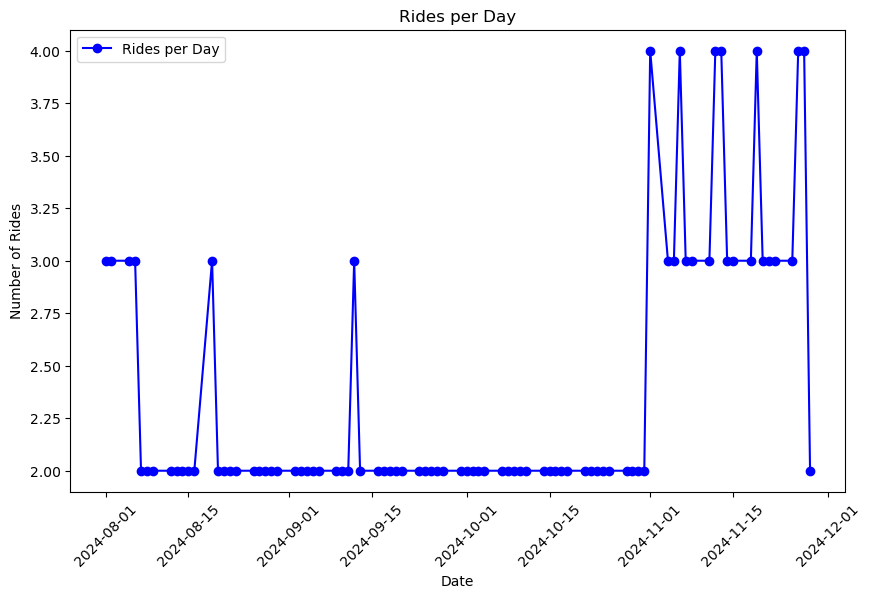

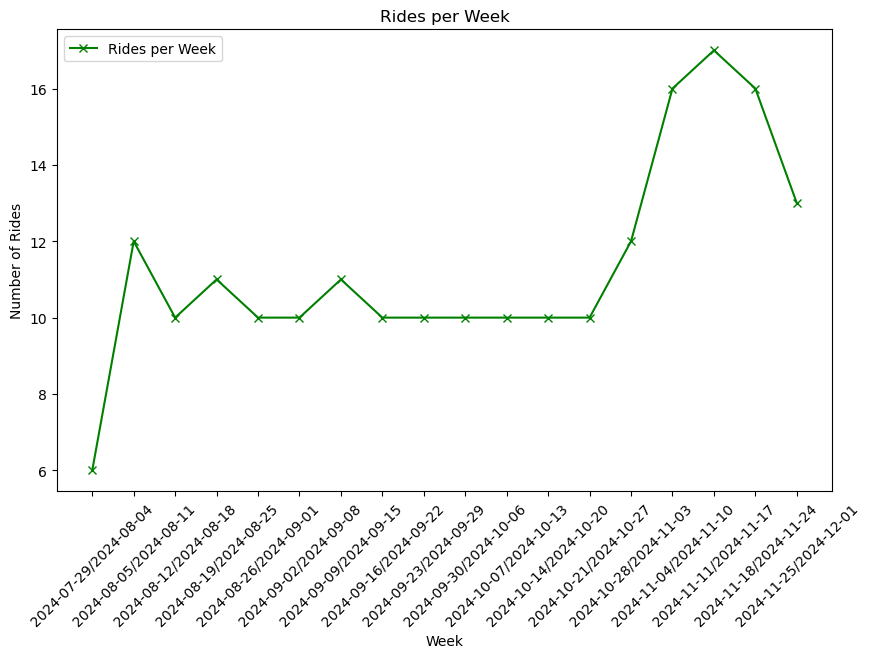

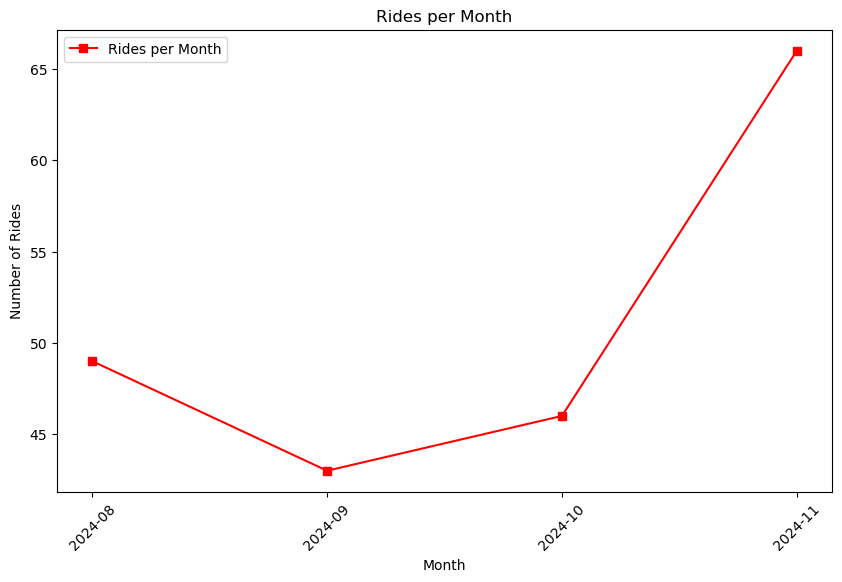

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Emissions_csv.csv')  # Replace with the actual file path if needed

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 1: Aggregating the data

# Rides per day
rides_per_day = df.groupby(df['Timestamp'].dt.date).size()

# Rides per week (grouping by the week of the year)
rides_per_week = df.groupby(df['Timestamp'].dt.to_period('W')).size()

# Rides per month (grouping by the month)
rides_per_month = df.groupby(df['Timestamp'].dt.to_period('M')).size()

# Step 2: Plotting the number of rides

# Plot rides per day
plt.figure(figsize=(10, 6))
plt.plot(rides_per_day.index, rides_per_day.values, label='Rides per Day', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Rides per Day')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot rides per week
plt.figure(figsize=(10, 6))
plt.plot(rides_per_week.index.astype(str), rides_per_week.values, label='Rides per Week', color='green', marker='x')
plt.xlabel('Week')
plt.ylabel('Number of Rides')
plt.title('Rides per Week')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot rides per month
plt.figure(figsize=(10, 6))
plt.plot(rides_per_month.index.astype(str), rides_per_month.values, label='Rides per Month', color='red', marker='s')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Rides per Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Same but with Plotly

In [13]:
# Step 1: Aggregating the data

# Rides per day
rides_per_day = df.groupby(df['Timestamp'].dt.date).size().reset_index(name='Rides')

# Rides per week (grouping by the week of the year) - Convert Period to string
rides_per_week = df.groupby(df['Timestamp'].dt.to_period('W')).size().reset_index(name='Rides')
rides_per_week['Timestamp'] = rides_per_week['Timestamp'].astype(str)  # Convert Period to string

# Rides per month (grouping by the month) - Convert Period to string
rides_per_month = df.groupby(df['Timestamp'].dt.to_period('M')).size().reset_index(name='Rides')
rides_per_month['Timestamp'] = rides_per_month['Timestamp'].astype(str)  # Convert Period to string

# Step 2: Plotting the number of rides

# Plot rides per day
fig_day = px.line(rides_per_day, x='Timestamp', y='Rides', 
                  title='Rides per Day', labels={'Timestamp': 'Date', 'Rides': 'Number of Rides'})
fig_day.update_xaxes(rangeslider_visible=True)
fig_day.show()

# Plot rides per week
fig_week = px.line(rides_per_week, x='Timestamp', y='Rides', 
                   title='Rides per Week', labels={'Timestamp': 'Week', 'Rides': 'Number of Rides'})
fig_week.update_xaxes(rangeslider_visible=True)
fig_week.show()

# Plot rides per month
fig_month = px.line(rides_per_month, x='Timestamp', y='Rides', 
                    title='Rides per Month', labels={'Timestamp': 'Month', 'Rides': 'Number of Rides'})
fig_month.update_xaxes(rangeslider_visible=True)
fig_month.show()

# Merge the User and Rides_emissions

In [ ]:
import pandas as pd

# Load the datasets
users_df = pd.read_csv('Users_csv.csv') 
rides_df = pd.read_csv('Rides_emissions_csv.csv')  

# Preview the structure of both datasets
# print(users_df.head())
# print(rides_df.head())

# Merge the Users dataset with the Rides dataset on the corresponding UserID and DriverID
# Assuming 'UserID' in Users_csv corresponds to 'DriverID' in Rides_csv
merged_df = pd.merge(rides_df, users_df[['UserID', 'Team']], left_on='DriverID', right_on='UserID', how='left')

# Drop the 'UserID' column as it is no longer needed in the final dataset
merged_df = merged_df.drop(columns=['UserID'])

# Preview the merged dataset
# print(merged_df.head())

# Save the merged data to a new CSV file (or you could save it to a JSON if needed)
#merged_df.to_csv('Merged_Rides_Users.csv', index=False)

# If you prefer to save the file as JSON, you can use:
# merged_df.to_json('Merged_Rides_Users.json', orient='records')


In [18]:
merged_df.head(2)

,RideID,Timestamp,WeekDay,StartLocation,EndLocation,Distance,DriverID,Offered Seats,PassangerID 1,PassangerID 2,PassangerID 3,PassangerID 4,PassangerCount,AvailableSeats,PotentialSavings,Emissions Saved in kg,Team
0,27,2024-08-30 17:30:00,Friday,Office,Aachen Hauptbahnhof,9.3,10055,3,10058,10099.0,10050.0,NaN,3,0,NaN,4.49,Beta
1,82,2024-08-14 19:00:00,Wednesday,Office,Aachen Hauptbahnhof,9.3,30006,3,20009,40005.0,20019.0,NaN,3,0,NaN,4.49,Charlie


## Create a animation showing the rides per Team per Week

In [25]:

# Step 1: Prepare the data by grouping by Team and Week
merged_df['Date'] = pd.to_datetime(merged_df['Timestamp']).dt.date  # Extract date from timestamp
merged_df['Week'] = pd.to_datetime(merged_df['Timestamp']).dt.to_period('W')  # Convert to week period

# Convert the Period object (Week) to a string for compatibility with Plotly
merged_df['Week'] = merged_df['Week'].astype(str)  # Convert Week period to string

# Group by Team and Week, and calculate the ride count
rides_per_week_team = merged_df.groupby(['Team', 'Week']).size().reset_index(name='Ride Count')

# Step 2: Create the Plotly animation
start_color = "#00453D"  # Darker green
end_color = "#E7F59E"  # Lighter green

fig = px.scatter(rides_per_week_team, 
                 x="Week", 
                 y="Ride Count", 
                 size="Ride Count",  # The size of the balls is based on the number of rides
                 color="Ride Count",  # Color will be based on the number of rides (color gradient)
                 animation_frame="Week",  # Animate the plot based on week
                 animation_group="Team",  # The animation will group by team
                 hover_name="Team", 
                 title="Number of Rides Per Week by Team",
                 range_x=[rides_per_week_team['Week'].min(), rides_per_week_team['Week'].max()],  # X-axis date range
                 range_y=[0, rides_per_week_team['Ride Count'].max() + 5]  # Y-axis range
                )

# Step 3: Customize color scale to use the gradient from start_color to end_color
fig.update_traces(marker=dict(
    colorscale=[[0, start_color], [1, end_color]],  # Gradient from start_color to end_color
    showscale=True  # Show color scale on the side
))

# Step 4: Customize layout for white background and labels
fig.update_layout(
    xaxis_title="Week",
    yaxis_title="Number of Rides",
    showlegend=True,
    template="plotly_white",  # Set background to white
    height=600,
    plot_bgcolor='white',  # Ensure the plot's background is white
    paper_bgcolor='white'  # Set the entire page background to white
)

# Step 5: Show the plot
fig.show()


## per month

In [26]:
# Step 1: Prepare the data by grouping by Team and Month
merged_df['Date'] = pd.to_datetime(merged_df['Timestamp']).dt.date  # Extract date from timestamp
merged_df['Month'] = pd.to_datetime(merged_df['Timestamp']).dt.to_period('M')  # Convert to month period

# Convert the Period object (Month) to a string for compatibility with Plotly
merged_df['Month'] = merged_df['Month'].astype(str)  # Convert Month period to string

# Group by Team and Month, and calculate the ride count
rides_per_month_team = merged_df.groupby(['Team', 'Month']).size().reset_index(name='Ride Count')

# Step 2: Calculate the team size (e.g., number of drivers per team)
# Here, we calculate the number of unique drivers per team (based on DriverID)
team_sizes = merged_df.groupby('Team')['DriverID'].nunique().reset_index(name='Team Size')

# Merge the team size with the rides data
rides_per_month_team = pd.merge(rides_per_month_team, team_sizes, on='Team', how='left')

# Step 3: Create the Plotly animation
start_color = "#00453D"  # Darker green
end_color = "#E7F59E"  # Lighter green

fig = px.scatter(rides_per_month_team, 
                 x="Month", 
                 y="Ride Count", 
                 size="Team Size",  # The size of the balls is based on the size of the team (number of drivers)
                 color="Team Size",  # Color will be based on the team size (color gradient)
                 animation_frame="Month",  # Animate the plot based on month
                 animation_group="Team",  # The animation will group by team
                 hover_name="Team", 
                 title="Number of Rides Per Month by Team",
                 range_x=[rides_per_month_team['Month'].min(), rides_per_month_team['Month'].max()],  # X-axis date range
                 range_y=[0, rides_per_month_team['Ride Count'].max() + 5]  # Y-axis range
                )

# Step 4: Customize color scale to use the gradient from start_color to end_color
fig.update_traces(marker=dict(
    colorscale=[[0, start_color], [1, end_color]],  # Gradient from start_color to end_color
    showscale=True  # Show color scale on the side
))

# Step 5: Customize layout for white background and labels
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Rides",
    showlegend=True,
    template="plotly_white",  # Set background to white
    height=600,
    plot_bgcolor='white',  # Ensure the plot's background is white
    paper_bgcolor='white'  # Set the entire page background to white
)

# Step 6: Show the plot
fig.show()

In [33]:
# Step 1: Prepare the data by grouping by Team and Month
merged_df['Date'] = pd.to_datetime(merged_df['Timestamp']).dt.date  # Extract date from timestamp
merged_df['Month'] = pd.to_datetime(merged_df['Timestamp']).dt.to_period('M')  # Convert to month period

# Convert the Period object (Month) to a string for compatibility with Plotly
merged_df['Month'] = merged_df['Month'].astype(str)  # Convert Month period to string

# Group by Team and Month, and calculate the ride count
rides_per_month_team = merged_df.groupby(['Team', 'Month']).size().reset_index(name='Ride Count')

# Step 2: Calculate the team size (e.g., number of drivers per team)
# Here, we calculate the number of unique drivers per team (based on DriverID)
team_sizes = merged_df.groupby('Team')['DriverID'].nunique().reset_index(name='Team Size')

# Merge the team size with the rides data
rides_per_month_team = pd.merge(rides_per_month_team, team_sizes, on='Team', how='left')

# Step 3: Create the Plotly animation
start_color = "#00453D"  # Darker green
end_color = "#66C2A5"  # Lighter greenish color

fig = px.scatter(rides_per_month_team, 
                 x="Month", 
                 y="Ride Count", 
                 size="Team Size",  # The size of the balls is based on the size of the team (number of drivers)
                 color="Team Size",  # Color will be based on the team size (color gradient)
                 animation_frame="Month",  # Animate the plot based on month
                 animation_group="Team",  # The animation will group by team
                 hover_name="Team", 
                 title="Number of Rides Per Month by Team",
                 range_x=[rides_per_month_team['Month'].min(), rides_per_month_team['Month'].max()],  # X-axis date range
                 range_y=[0, rides_per_month_team['Ride Count'].max() + 5]  # Y-axis range
                )

# Step 4: Customize color scale to use the gradient from start_color to end_color
fig.update_traces(marker=dict(
    colorscale=[[0, start_color], [1, end_color]],  # Gradient from start_color to end_color
    showscale=True  # Show color scale on the side
))

# Step 5: Customize layout for white background and labels, and remove grid lines
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Rides",
    showlegend=True,
    template="plotly_white",  # Set background to white
    height=600,
    plot_bgcolor='white',  # Ensure the plot's background is white
    paper_bgcolor='white',  # Set the entire page background to white
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}]
        }]
    }],
    xaxis=dict(
        showgrid=False  # Remove grid lines for x-axis
    ),
    yaxis=dict(
        showgrid=False  # Remove grid lines for y-axis
    )
)

# Step 6: Show the plot
fig.show()

# Line chart for weekly emissions saved

In [44]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Load your dataset (replace the path with the actual file location)
df = merged_df

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a new column 'Week' to represent the week of the year for each ride
df['Week'] = df['Timestamp'].dt.to_period('W')  # Convert the timestamp to a week period

# Group by week and sum the 'Emissions Saved in kg'
weekly_emissions = df.groupby('Week')['Emissions Saved in kg'].sum().reset_index()

# Convert the 'Week' period to string for plotting purposes
weekly_emissions['Week'] = weekly_emissions['Week'].astype(str)

# Create the line chart using Plotly
fig = px.line(weekly_emissions, x='Week', y='Emissions Saved in kg', title='Weekly Emissions Saved',
              labels={'Emissions Saved in kg': 'Total Emissions Saved (kg)', 'Week': 'Week of the Year'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    template='plotly_white',  # Set background to white
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    xaxis=dict(showgrid=False),  # Remove grid lines from the x-axis
    yaxis=dict(showgrid=False),  # Remove grid lines from the y-axis
    title_x=0.5  # Center the title
)

# Save the figure as a JSON file using plotly.io.write_json
json_file_path = "weekly_emissions_chart.json"  # Define the output path for JSON
pio.write_json(fig, json_file_path)  # Save the figure as a JSON file

# Display the figure (optional)
fig.show()

print(f"Chart saved as JSON to {json_file_path}")


Chart saved as JSON to weekly_emissions_chart.json


## per month

In [45]:

# Load your dataset (replace the path with the actual file location)
df = merged_df # Replace with the actual path to your data

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a new column 'Month' to represent the month for each ride
df['Month'] = df['Timestamp'].dt.to_period('M')  # Convert the timestamp to a month period

# Group by month and sum the 'Emissions Saved in kg'
monthly_emissions = df.groupby('Month')['Emissions Saved in kg'].sum().reset_index()

# Convert the 'Month' period to string for plotting purposes
monthly_emissions['Month'] = monthly_emissions['Month'].astype(str)

# Create the line chart using Plotly
fig = px.line(monthly_emissions, x='Month', y='Emissions Saved in kg', title='Monthly Emissions Saved',
              labels={'Emissions Saved in kg': 'Total Emissions Saved (kg)', 'Month': 'Month'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    template='plotly_white',  # Set background to white
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    xaxis=dict(showgrid=False),  # Remove grid lines from the x-axis
    yaxis=dict(showgrid=False),  # Remove grid lines from the y-axis
    title_x=0.5,  # Center the title
    xaxis_title='Month',
    yaxis_title='Total Emissions Saved (kg)',
)

# Customize the line style
fig.update_traces(
    line=dict(color='green', width=4)  # Make the line green and thicker
)

# Save the figure as a JSON file using plotly.io.write_json
json_file_path = "monthly_emissions_chart.json"  # Define the output path for JSON
pio.write_json(fig, json_file_path)  # Save the figure as a JSON file

# Display the figure (optional)
fig.show()

print(f"Chart saved as JSON to {json_file_path}")

Chart saved as JSON to monthly_emissions_chart.json


## per day

In [46]:
# Load your dataset (replace the path with the actual file location)
df = merged_df  # Replace with the actual path to your data

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by day and sum the 'Emissions Saved in kg'
daily_emissions = df.groupby(df['Timestamp'].dt.date)['Emissions Saved in kg'].sum().reset_index()

# Convert 'Timestamp' to string to use in the plot
daily_emissions['Timestamp'] = daily_emissions['Timestamp'].astype(str)

# Create the line chart using Plotly
fig = px.line(daily_emissions, x='Timestamp', y='Emissions Saved in kg', title='Daily Emissions Saved',
              labels={'Emissions Saved in kg': 'Total Emissions Saved (kg)', 'Timestamp': 'Date'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    template='plotly_white',  # Set background to white
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    xaxis=dict(showgrid=False),  # Remove grid lines from the x-axis
    yaxis=dict(showgrid=False),  # Remove grid lines from the y-axis
    title_x=0.5,  # Center the title
    xaxis_title='Date',
    yaxis_title='Total Emissions Saved (kg)',
    xaxis_tickangle=45  # Rotate x-axis labels for better readability
)

# Customize the line style
fig.update_traces(
    line=dict(color='green', width=4)  # Make the line green and thicker
)

# Save the figure as a JSON file using plotly.io.write_json
json_file_path = "daily_emissions_chart.json"  # Define the output path for JSON
pio.write_json(fig, json_file_path)  # Save the figure as a JSON file

# Display the figure (optional)
fig.show()

print(f"Chart saved as JSON to {json_file_path}")

Chart saved as JSON to daily_emissions_chart.json


### change color

In [54]:

# Load your dataset (replace the path with the actual file location)
df = merged_df  # Replace with the actual path to your data

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by day and sum the 'Emissions Saved in kg'
daily_emissions = df.groupby(df['Timestamp'].dt.date)['Emissions Saved in kg'].sum().reset_index()

# Convert 'Timestamp' to string to use in the plot
daily_emissions['Timestamp'] = daily_emissions['Timestamp'].astype(str)

# Create the line chart using Plotly
fig_daily = px.line(daily_emissions, x='Timestamp', y='Emissions Saved in kg', title='Daily Emissions Saved',
                    labels={'Emissions Saved in kg': 'Total Emissions Saved (kg)', 'Timestamp': 'Date'},
                    line_shape='linear')

# Customize the layout
fig_daily.update_layout(
    template='plotly_white',
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    xaxis=dict(showgrid=False),  # Remove grid lines from the x-axis
    yaxis=dict(showgrid=False),  # Remove grid lines from the y-axis
    title_x=0.5,  # Center the title
    xaxis_title='',
    yaxis_title='Total Emissions Saved (kg)',
    xaxis_tickangle=45  # Rotate x-axis labels for better readability
)

# Customize the line style
fig_daily.update_traces(
    line=dict(color='#00453D', width=4)  # Dark green line and thicker
)

# Save the figure as a JSON file using plotly.io.write_json
json_file_daily = "daily_emissions_chart.json"  # Define the output path for JSON
pio.write_json(fig_daily, json_file_daily)  # Save the figure as a JSON file

# Display the figure (optional)
fig_daily.show()

print(f"Daily Chart saved as JSON to {json_file_daily}")


Daily Chart saved as JSON to daily_emissions_chart.json


### change color

In [49]:
# Group by week and sum the 'Emissions Saved in kg'
weekly_emissions = df.groupby(df['Timestamp'].dt.to_period('W'))['Emissions Saved in kg'].sum().reset_index()

# Convert 'Timestamp' to string for plotting
weekly_emissions['Timestamp'] = weekly_emissions['Timestamp'].astype(str)

# Create the line chart using Plotly
fig_weekly = px.line(weekly_emissions, x='Timestamp', y='Emissions Saved in kg', title='Weekly Emissions Saved',
                     labels={'Emissions Saved in kg': 'Total Emissions Saved (kg)', 'Timestamp': 'Week'},
                     line_shape='linear')

# Customize the layout
fig_weekly.update_layout(
    template='plotly_white',
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    xaxis=dict(showgrid=False),  # Remove grid lines from the x-axis
    yaxis=dict(showgrid=False),  # Remove grid lines from the y-axis
    title_x=0.5,  # Center the title
    xaxis_title='Week',
    yaxis_title='Total Emissions Saved (kg)',
    xaxis_tickangle=45  # Rotate x-axis labels for better readability
)

# Customize the line style
fig_weekly.update_traces(
    line=dict(color='#00453D', width=4)  # Dark green line and thicker
)

# Save the figure as a JSON file using plotly.io.write_json
json_file_weekly = "weekly_emissions_chart.json"  # Define the output path for JSON
pio.write_json(fig_weekly, json_file_weekly)  # Save the figure as a JSON file

# Display the figure (optional)
fig_weekly.show()

print(f"Weekly Chart saved as JSON to {json_file_weekly}")


Weekly Chart saved as JSON to weekly_emissions_chart.json


### change color

In [53]:
# Group by month and sum the 'Emissions Saved in kg'
monthly_emissions = df.groupby(df['Timestamp'].dt.to_period('M'))['Emissions Saved in kg'].sum().reset_index()

# Convert 'Timestamp' to string for plotting
monthly_emissions['Timestamp'] = monthly_emissions['Timestamp'].astype(str)

# Create the line chart using Plotly
fig_monthly = px.line(monthly_emissions, x='Timestamp', y='Emissions Saved in kg', title='Monthly Emissions Saved',
                       labels={'Emissions Saved in kg': 'Total Emissions Saved (kg)', 'Timestamp': 'Month'},
                       line_shape='linear')

# Customize the layout
fig_monthly.update_layout(
    template='plotly_white',
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    xaxis=dict(showgrid=False),  # Remove grid lines from the x-axis
    yaxis=dict(showgrid=False),  # Remove grid lines from the y-axis
    title_x=0.5,  # Center the title
    xaxis_title='',
    yaxis_title='Total Emissions Saved (kg)',
    xaxis_tickangle=45  # Rotate x-axis labels for better readability
)

# Customize the line style
fig_monthly.update_traces(
    line=dict(color='#00453D', width=4)  # Dark green line and thicker
)

# Save the figure as a JSON file using plotly.io.write_json
json_file_monthly = "monthly_emissions_chart.json"  # Define the output path for JSON
pio.write_json(fig_monthly, json_file_monthly)  # Save the figure as a JSON file

# Display the figure (optional)
fig_monthly.show()

print(f"Monthly Chart saved as JSON to {json_file_monthly}")


Monthly Chart saved as JSON to monthly_emissions_chart.json


In [52]:

# Load your dataset (replace the path with the actual file location)
df = merged_df

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by week and sum the 'Emissions Saved in kg'
weekly_emissions = df.groupby(df['Timestamp'].dt.to_period('W'))['Emissions Saved in kg'].sum().reset_index()

# Convert 'Timestamp' to string for plotting and format it as 'Week <week number>'
weekly_emissions['Week'] = weekly_emissions['Timestamp'].dt.week  # Get the week number from the period
weekly_emissions['Week'] = 'Week ' + weekly_emissions['Week'].astype(str)  # Format as "Week 1", "Week 2", etc.

# Create the line chart using Plotly
fig_weekly = px.line(weekly_emissions, x='Week', y='Emissions Saved in kg', title='Weekly Emissions Saved',
                     labels={'Emissions Saved in kg': 'Total Emissions Saved (kg)', 'Week': 'Week'},
                     line_shape='linear')

# Customize the layout
fig_weekly.update_layout(
    template='plotly_white',
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    xaxis=dict(showgrid=False),  # Remove grid lines from the x-axis
    yaxis=dict(showgrid=False),  # Remove grid lines from the y-axis
    title_x=0.5,  # Center the title
    xaxis_title='',
    yaxis_title='Total Emissions Saved (kg)',
    xaxis_tickangle=45  # Rotate x-axis labels for better readability
)

# Customize the line style
fig_weekly.update_traces(
    line=dict(color='#00453D', width=4)  # Dark green line and thicker
)

# Save the figure as a JSON file using plotly.io.write_json
json_file_weekly = "weekly_emissions_chart.json"  # Define the output path for JSON
pio.write_json(fig_weekly, json_file_weekly)  # Save the figure as a JSON file

# Display the figure (optional)
fig_weekly.show()

print(f"Weekly Chart saved as JSON to {json_file_weekly}")

Weekly Chart saved as JSON to weekly_emissions_chart.json


# Pie with total emissions saved

In [75]:
import plotly.graph_objects as go  # Ensure this import is present
data = merged_df
# Calculate the total CO2 saved by summing the 'Emissions Saved in kg' column
total_co2_saved = data['Emissions Saved in kg'].sum()

# Create a full pie chart with only one slice and a single green color
fig = go.Figure(data=[go.Pie(
    labels=["Total CO2 Saved"],  # Only one label
    values=[total_co2_saved],  # Only one value (total CO2 saved)  # This makes it a donut chart
    marker=dict(colors=["#00453D"]),  # Green color for the entire pie
    textinfo="label+value",  # Show label and the actual value
    texttemplate="<b>%{label}</b><br><br><br><br><span style='font-size: 60px;'>%{value:.0f}kg</span>",  # Customize label and value
    textfont=dict(size=12),  # Adjust the font size for the label
    hoverinfo="label+value",  # Hover information showing label and value
)])

# Center title and adjust its size
fig.update_layout(
    title=dict(
        text="",  # Title of the chart
        x=0.5,  # Center horizontally
        y=0.9,  # Center vertically within the chart area
        font=dict(size=24)  # Adjust title font size
    ),
    showlegend=False  # Hide the legend as there is only one slice
)

# Show the chart
fig.show()

In [76]:
# Save chart as a JSON file
json_file_path = "pie_chart_total_co2.json"  # Define the output path
pio.write_json(fig, json_file_path)

print(f"Chart saved as JSON to {json_file_path}")

Chart saved as JSON to pie_chart_total_co2.json
